# Monte Carlo simulations for space systems reliability

## Introduction

An interesting application of the Monte Carlo method is the comparison of different system architectures and choosing the optimal one for a given mission. While comparisons can be made using analytical formulas, Monte Carlo simulations can indicate deviations from the expected behaviors and since they usually have a specified failure condition which is based on logic transitions, they enable the investigation of complex systems which have extremely complicated definitions for the reliability (or cases where we cannot compute an analytical formula for the relaibility). In general, the reliability function $R(t)$ can be defined as the probability of a component/system not failing until the time step $t$. This is why reliability is also commonly defined as:

$$
R(t)=1-F(t)
$$

where $F(t)$ corresponds to the cumulative distribution function for the component/system. For electronic systems, the distribution which better interprets the data is the **exponential distribution**, resulting in:

$$
F(t)=\int_{0}^{t} f(x) d x=1-e^{-\lambda t}
$$

and finally 

$$
\mathrm{R}(\mathrm{t})=1-\mathrm{F}(\mathrm{t})=\mathrm{e}^{-\lambda t}
$$ 

which enables us to calculate the reliability of an electronic component at time $t$, given the failure rate $\lambda$ of the component.

## Space environment 

Space systems in Earth orbits are subject to different kinds of radiation environments. These include:

1. **Van Allen belts**
   - Trapped protons and electrons (internal belt)
   - Trapped electrons (external belt)
2. **Solar energetic particles** 
   - Electrons and protons/heavy ions (solar flares)
   - Protons and heavy ions (Coronal Mass Ejections)
3. **Cosmic galactic rays**
   - Protons and heavy ions
   
These particles can have a negative effect on systems operating in earth orbits. Specifically they can cause several types of damages, including:

1. Displacement damage
2. Total Ionizing dose damage
3. **Single Events**

In this assignment we are interested in single events, which due to their random nature can be modeled very accurately using Monte Carlo simulations so that we can compare architectures for a spacecraft's On-board processing system. Specifically, we will investigate micro-controller units and determine **which architecture is the most preferable at the orbit environment of the International Space Station**. The four architectures which we are going to compare are:

1. Single MCU 
2. Dual Redundant MCU
3. Triple Modular Redundancy with immune voter
4. Triple Modular Redundancy with non-immune voter

## OMERE/Failure rates due to radiation effects

OMERE is a free program by TRAD which enables users to calculate dose estimates and susceptibility of components to radiation while in orbit. For more accurate results, a user can input radiation testing data instead of built in values. We will utilize 2 main components:

1) **Micro-controller Cypress EZ-USB FX2**, which has the functionality required to perform tasks in small satellites

The test report for Cypress EZ-USB FX2 can be found [here](https://radhome.gsfc.nasa.gov/radhome/papers/T041911_USBFX2_USB2512.pdf). The main result from this test report is the cross section vs LET plot.

![Test report data for Cypress EZ-USB FX2](mcu_curve.png)

| LET [MEV cm^2/mg]| Device Cross Section |
| :--------: | :--------: |
| 1.818182 | 9.55E-07 |
| 2.109091 | 3.67E-07 |
| 2.981818 | 4.5E-06  |
| 8.8      | 1.54E-05 |
| 8.945455 | 9.34E-05 |
| 12.43636 | 0.000579 |
| 20.72727 | 0.000761 |
| 20.72727 | 0.000393 |
| 28.58182 | 0.000679 |
| 28.87273 | 0.009775 |
| 29.30909 | 0.002272 |
| 52.87273 | 0.000579 |
| 53.30909 | 0.014402 |
| 53.45455 | 0.001071 |
| 75.70909 | 0.005403 |
| 75.70909 | 0.025465 |
| 75.85455 | 0.001851 |
| 87.49091 | 0.011207 |
| 87.78182 | 0.001937 |
| 106.2545 | 0.000694 |
| 106.8364 | 0.00292  |

Fitting a Weibull distribution to this data and providing it to OMERE, we can calculate a failure rate of:

$$
\lambda_{MCU}= 3.17\times10^{-4}\; \frac{failures}{day}
$$


2) **Microcontroller Texas Instruments MSP430FR5969-SP**, which offers very limited functionality and thus can be selected as a voter circuit.

The test report for MSP430FR5969-SP can be found here [here](https://www.ti.com/lit/rr/slak026/slak026.pdf). The main result from this test report is the cross section vs LET plot.

![Test report data for MSP430FR5969-SP](voter_curve.png)


| LET [MEV cm^2/mg]| Device Cross Section |
| :--------: | :--------: |
| 3.882127 | 8.05E-07 |
| 20.83679 | 4.91E-06 |
| 22.00243 | 1.86E-06 |
| 23.48596 | 3.19E-06 |
| 48.38812 | 6.14E-06 |
| 50.18956 | 3.4E-06  |
| 54.95806 | 4.47E-06 |
| 62.05782 | 5.53E-06 |
| 68.94565 | 5.99E-06 |

In both cases these data are fitted to a Weibull distribution to be used as input to OMERE to compute a realistic response to heavy ions. OMERE will then return the expected Single Event Effects rate per day. 

Fitting a Weibull distribution to this data and providing it to OMERE, we can calculate a failure rate of:

$$
\lambda_{voter}= 3.13\times10^{-6}\; \frac{failures}{day}
$$

## Random number generator

In order for us to conduct a Monte Carlo simulation, we need random numbers to determine the system's behavior. For convenience, these random numbers have to be distributed uniformly within the interval $[0,1]$. We will implement a dedicated random number generator using the linear repeat method (or the so called **Linear congruential method**). This random number generator is based on the general relationship:

$$
x_{n+1}=\left[a_{0} x_{n}+a_{1} x_{n-1}+\cdots+a_{j} x_{n-j}+b\right] \bmod M
$$

to simplify things, we will use the relationship:

$$
x_{n+1}=\left[a x_{n}+b\right] \bmod M
$$

where $M$ has to be a very large number (since we are using a 64 bit system we will use $M=2^{64}-1$), $a=1812433253$ and $b$ has to be an odd number. We will also check the behavior of our random number generator. An obvious downside is that since the generation of a new random number requires the previous one, the numbers are correlated (which is an issue for smaller values of $a$ and $M$.

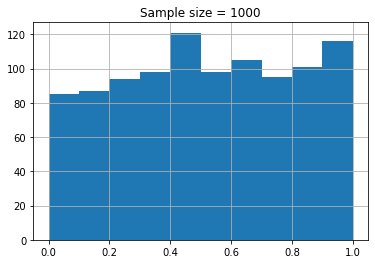

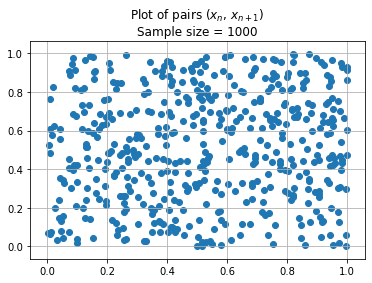

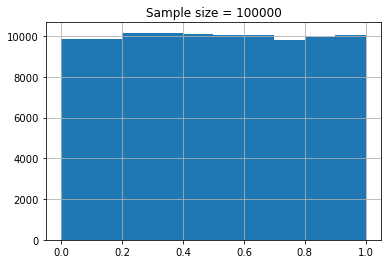

[0.2506476679042393, 0.25050892233902305, 0.2506513026382199, 0.2504787236977658, 0.2504478901170785]


In [1]:
import matplotlib.pyplot as plt
# Make jupyter export images as .pdf files for higher quality
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png', 'pdf')


def linear_congruential_generator(xn_prev, N):
    numbers_list = []
    for i in range(0, N):
        a = 1812433253
        M = pow(2, 64) - 1
        b = 89539
        xn_next = (a*xn_prev+b) % M
        numbers_list.append(xn_next/M)
        xn_prev = xn_next
    return numbers_list


numbers = 1000
result = linear_congruential_generator(0.02, numbers)
plt.figure()
plt.hist(result)
plt.title("Sample size = %d" % numbers)
plt.grid()

x_vector = [0.5]
y_vector = [0.0]
for i in range(0, numbers-1):
    if i == 0:
        y_vector[0] = result[i]
    elif i%2==0:
        y_vector.append(result[i])
    else:
        x_vector.append(result[i])

plt.figure()
plt.scatter(x_vector, y_vector)
plt.title("Plot of pairs ($x_{n}$, $x_{n+1}$)\nSample size = %d" % numbers)
plt.grid()
plt.show()

numbers = 100000
result = linear_congruential_generator(0.02, numbers)
plt.figure()
plt.hist(result)
plt.title("Sample size = %d" % numbers)
plt.grid()
plt.show()

c = []
for i in range(1, 6):
    sum = 0
    for j in range(0, numbers-i):
        sum += result[j]*result[j+i]
    c.append(sum/(j+1))

print(c)

There are two things to take away from this random number generator

1) By plotting ($x_{n}$, $x_{n+1}$) in pairs, no apparent correlation between points is apparent. Based only on this, we can conclude that our numbers are random.
2) However, if the random variables X and Y are independent and uniform in $[0, 1]$, then the mean for their product shall be:

$$
\langle x y\rangle=\int_{0}^{1} \int_{0}^{1} x y d x d y=\int_{0}^{1} x d x \int_{0}^{1} y d y=\frac{1}{4}
$$

which we can check by defining a sequence of random numbers ${x_i}$ and ${y_i}={x_{i+k}}$ and calculate the average 

$$
c(k)=\frac{1}{N} \sum_{i=1}^{N} x_{i} x_{i+k}, \quad k=1,2,3, \cdots
$$

Since we can observe that for all cases we have $c(k) \simeq \frac{1}{4}$ the numbers seem to be uncorrelated. But, since the error is higher than $\frac{1}{\sqrt{N}}$, there is a measurable correlation between our points. This is why we will refer to our numbers as pseudo-random.

## Case 1: Single MCU

The architecture is the following

![Single MCU Architecture](case_1.png)

For a single MCU, the system reliability is equal to the component reliability, namely: 

$$
\mathrm{R_{system}}(\mathrm{t})=\mathrm{e}^{-\lambda_{MCU} t}
$$ 

Let us know implement a Monte Carlo simulation and compare it to the expected theoretical reliability.

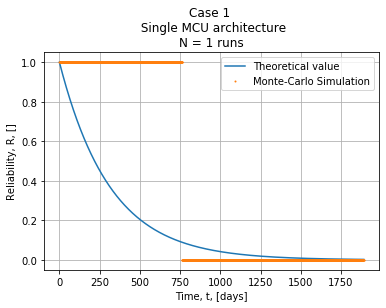

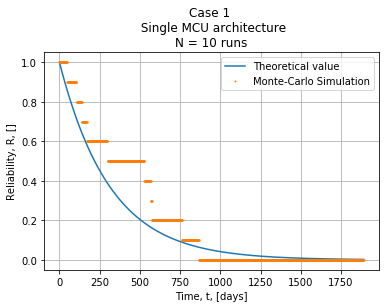

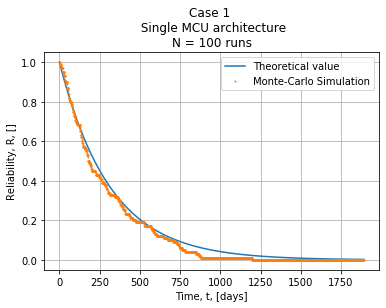

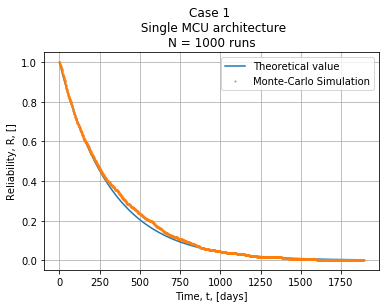

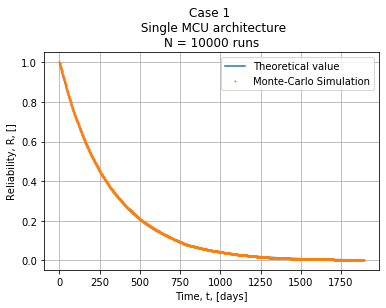

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from random_number_generators import linear_congruential_generator

# Reliability function definition
def reliability_function(time, mttf):
    return np.exp(-time / mttf)


def single_component(runs):
    # Input data
    lambda_MCU = 3.17 * pow(10, -3)  # [per day, OMERE data]
    MTTF_MCU = 1 / lambda_MCU  # [days]

    # Define time domain

    t_start = 0
    t_end = 6 * MTTF_MCU
    t_step = 1
    time_domain = np.arange(t_start, t_end, t_step)
    random_numbers = linear_congruential_generator(0.5, runs+1)

    # Calculate theoretical reliability at each time step
    theoretical_reliability = []
    for i in range(0, np.size(time_domain)):
        theoretical_reliability.append(reliability_function(time_domain[i], MTTF_MCU))

    # Main Monte-Carlo Simulation
    failure_time = []
    working_devices = np.zeros(np.size(time_domain))
    for i in range(0, runs):
        random_value = random_numbers[i+1]
        for j in range(0, np.size(time_domain)):
            if theoretical_reliability[j] < random_value:
                failure_time.append(time_domain[j])
                break
            working_devices[j] += 1

    plt.figure()
    plt.plot(time_domain, theoretical_reliability, label="Theoretical value")
    plt.plot(time_domain, working_devices / runs, '.', markersize=2, label="Monte-Carlo Simulation")
    plt.xlabel("Time, t, [days]")
    plt.ylabel("Reliability, R, []")
    plt.title("Case 1 \n Single MCU architecture\nN = %d runs" % runs)
    plt.grid()
    plt.legend()
    plt.show()
    return (working_devices / runs)
    
    
# Number of experiment runs
runs = [1, 10, 100, 1000, 10000]
for i in range(0, np.size(runs)):
    result_case1 = single_component(runs[i])

## Case 2: Dual MCU (Hot Redundancy)

The architecture is the following:

![Hot redundancy architecture](case_2_3.png)

The probability that we have a functional system is:

$$
P_{\text {sys }}=\left(P_{MCU1} \cup P_{MCU2}\right)
$$

or in terms of reliability:

$$
R_{s y s}=\left(1-\left(1-R_{MCU1}\right)\left(1-R_{MCU2}\right)\right)
$$

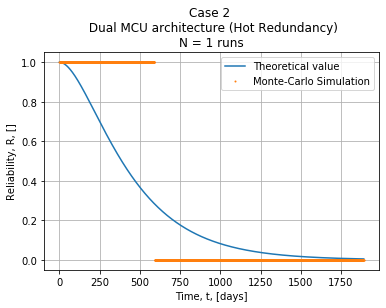

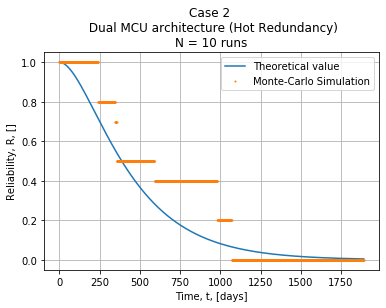

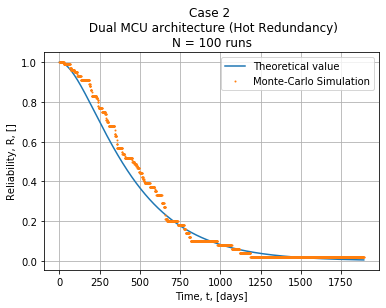

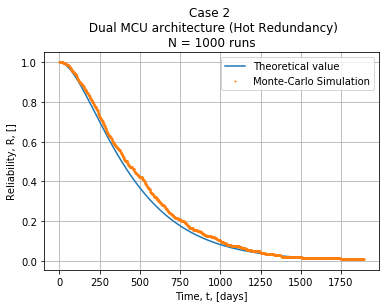

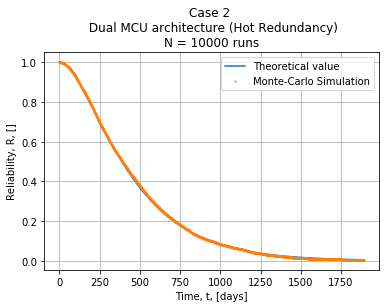

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from random_number_generators import linear_congruential_generator

# Reliability function definition
def system_reliability_function(time, mttf):
    return 1-((1-np.exp(-time / mttf))*(1-np.exp(-time / mttf)))


# Component reliability
def component_reliability_function(time, mttf):
    return np.exp(-time / mttf)


def dual_mcu(runs): 
    # Input data
    lambda_MCU = 3.17 * pow(10, -3)  # [per day, OMERE data]
    MTTF_MCU = 1 / lambda_MCU  # [days]

    # Define time domain

    t_start = 0
    t_end = 6 * MTTF_MCU
    t_step = 1
    time_domain = np.arange(t_start, t_end, t_step)
    random_numbers = linear_congruential_generator(0.862, runs+2)

    # Calculate theoretical reliability at each time step
    theoretical_system_reliability = []
    theoretical_component_reliability = []
    for i in range(0, np.size(time_domain)):
        theoretical_system_reliability.append(system_reliability_function(time_domain[i], MTTF_MCU))
        theoretical_component_reliability.append(component_reliability_function(time_domain[i], MTTF_MCU))

    # Main Monte-Carlo Simulation
    failure_time_system = []
    working_devices = np.zeros(np.size(time_domain))
    for i in range(0, runs):
        random_value_first = random_numbers[i+1]
        random_value_second = random_numbers[i+2]
        state_first_mcu = 1
        state_second_mcu = 1
        for j in range(0, np.size(time_domain)):
            if theoretical_component_reliability[j] < random_value_first:
                state_first_mcu = 0
            if theoretical_component_reliability[j] < random_value_second:
                state_second_mcu = 0
            if state_first_mcu == 0 and state_second_mcu == 0:
                failure_time_system.append(time_domain[j])
                break
            working_devices[j] += 1

    plt.figure()
    plt.plot(time_domain, theoretical_system_reliability, label="Theoretical value")
    plt.plot(time_domain, working_devices / runs, '.', markersize=2, label="Monte-Carlo Simulation")
    plt.xlabel("Time, t, [days]")
    plt.ylabel("Reliability, R, []")
    plt.title("Case 2 \n Dual MCU architecture (Hot Redundancy)\nN = %d runs" % runs)
    plt.grid()
    plt.legend()
    plt.show()
    return (working_devices / runs)
    

# Number of experiment runs
runs = [1, 10, 100, 1000, 10000]
for i in range(0, np.size(runs)):
    result_case2 = dual_mcu(runs[i])

## Case 3: Dual MCU (Cold Redundancy)

The architecture is the following:

![Cold Redundancy Architecture](case_2_3.png)

For cold redundancy, it is assumed that the second MCU is not susceptible to radiation until it starts functioning. In terms of reliability, this is calculated as:

$$
R_{sys} = R_{MCU1} + R_{MCU2}\lambda_{MCU2}t
$$

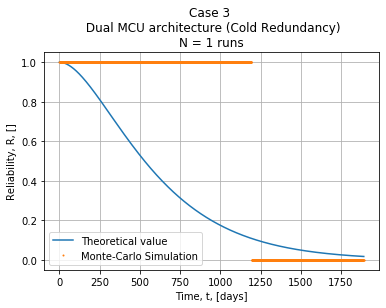

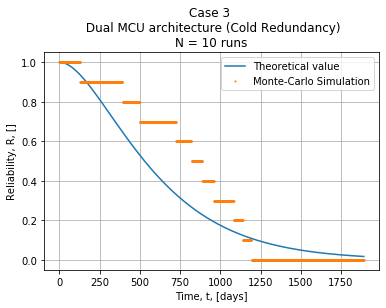

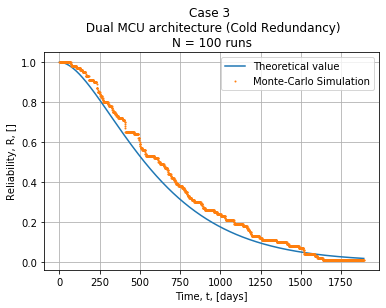

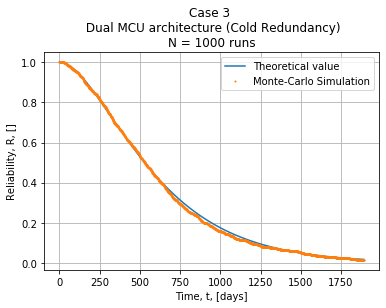

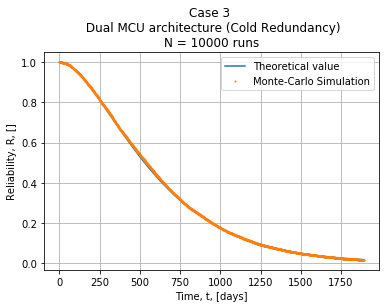

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from random_number_generators import linear_congruential_generator

# Reliability function definition
def system_reliability_function(time, mttf):
    return (np.exp(-time / mttf))+(np.exp(-time / mttf))*(time / mttf)


# Component reliability
def component_reliability_function(time, mttf):
    return np.exp(-time / mttf)

def dual_mcu(runs):
    random_numbers = linear_congruential_generator(0.742, runs+2)
    # Input data
    lambda_MCU = 3.17 * pow(10, -3)  # [per day, OMERE data]
    MTTF_MCU = 1 / lambda_MCU  # [days]

    # Define time domain

    t_start = 0
    t_end = 6 * MTTF_MCU
    t_step = 1
    time_domain = np.arange(t_start, t_end, t_step)

    # Calculate theoretical reliability at each time step
    theoretical_system_reliability = []
    theoretical_component_reliability = []
    for i in range(0, np.size(time_domain)):
        theoretical_system_reliability.append(system_reliability_function(time_domain[i], MTTF_MCU))
        theoretical_component_reliability.append(component_reliability_function(time_domain[i], MTTF_MCU))

    # Main Monte-Carlo Simulation
    failure_time_system = []
    working_systems = np.zeros(np.size(time_domain))
    for i in range(0, runs):
        random_value_first = random_numbers[i+1]
        random_value_second = random_numbers[i+2]
        state_first_mcu = 1
        state_second_mcu = 1
        for j in range(0, np.size(time_domain)):
            if theoretical_component_reliability[j] < random_value_first:
                for k in range(j, np.size(time_domain)):
                    if theoretical_component_reliability[k-j] < random_value_second:
                        failure_time_system.append(time_domain[k])
                        break
                    working_systems[k] += 1
                break
            working_systems[j] += 1

    plt.figure()
    plt.plot(time_domain, theoretical_system_reliability, label="Theoretical value")
    plt.plot(time_domain, working_systems / runs, '.', markersize=2, label="Monte-Carlo Simulation")
    plt.xlabel("Time, t, [days]")
    plt.ylabel("Reliability, R, []")
    plt.title("Case 3 \n Dual MCU architecture (Cold Redundancy)\nN = %d runs" % runs)
    plt.grid()
    plt.legend()
    plt.show()
    return (working_systems / runs)


# Number of experiment runs
runs = [1, 10, 100, 1000, 10000]
for i in range(0, np.size(runs)):
    result_case3 = dual_mcu(runs[i])

## Case 4: Triple modular redundancy (Immune voter) 

The architecture is the following:

![Triple modular redundancy (Immune voter)](case_4.png)

the reliability function is given by:

$$
\mathrm{R}_{\mathrm{sys}}=\mathrm{R}_{\mathrm{voter}}\left(3 \mathrm{R}_{\mathrm{MCU}}^{2}-2 \mathrm{R}_{\mathrm{MCU}}^{3}\right)
$$

where $R_{voter}=1$ since the voter is considered to be immune to radiation.

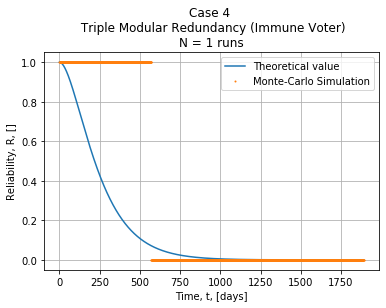

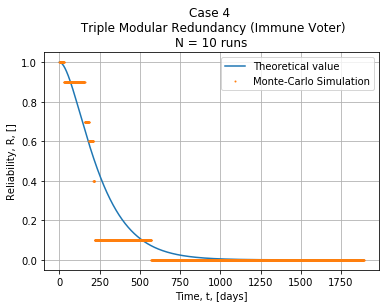

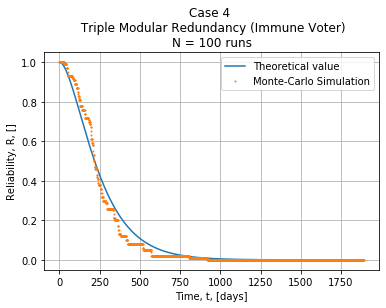

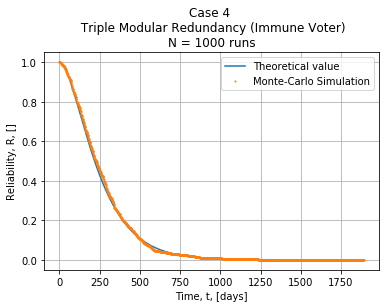

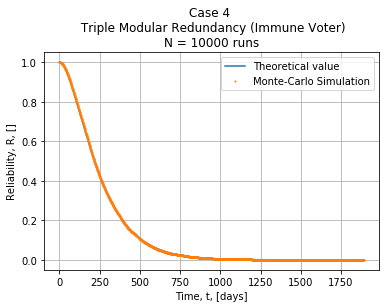

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from random_number_generators import linear_congruential_generator


# Reliability function definition
def system_reliability_function(time, mttf):
    return 3*pow(np.exp(-time / mttf), 2) - 2*pow(np.exp(-time / mttf), 3)


# Component reliability
def component_reliability_function(time, mttf):
    return np.exp(-time / mttf)


def tmr(runs):
    # Input data
    lambda_MCU = 3.17 * pow(10, -3)  # [per day, OMERE data]
    MTTF_MCU = 1 / lambda_MCU  # [days]

    # Define time domain

    t_start = 0
    t_end = 6 * MTTF_MCU
    t_step = 1
    time_domain = np.arange(t_start, t_end, t_step)
    random_numbers = linear_congruential_generator(0.389, runs+3)

    # Calculate theoretical reliability at each time step
    theoretical_system_reliability = []
    theoretical_component_reliability = []
    for i in range(0, np.size(time_domain)):
        theoretical_system_reliability.append(system_reliability_function(time_domain[i], MTTF_MCU))
        theoretical_component_reliability.append(component_reliability_function(time_domain[i], MTTF_MCU))

    # Main Monte-Carlo Simulation
    failure_time_system = []
    working_systems = np.zeros(np.size(time_domain))
    for i in range(0, runs):
        random_value_first = random_numbers[i+1]
        random_value_second = random_numbers[i+2]
        random_value_third = random_numbers[i+3]
        state_first_mcu = 1
        state_second_mcu = 1
        state_third_mcu = 1
        for j in range(0, np.size(time_domain)):
            if theoretical_component_reliability[j] < random_value_first:
                state_first_mcu = 0
            if theoretical_component_reliability[j] < random_value_second:
                state_second_mcu = 0
            if theoretical_component_reliability[j] < random_value_third:
                state_third_mcu = 0
            total_state = state_first_mcu + state_second_mcu + state_third_mcu
            if total_state < 2:
                failure_time_system.append(time_domain[j])
                break
            working_systems[j] += 1

    plt.figure()
    plt.plot(time_domain, theoretical_system_reliability, label="Theoretical value")
    plt.plot(time_domain, working_systems / runs, '.', markersize=2, label="Monte-Carlo Simulation")
    plt.xlabel("Time, t, [days]")
    plt.ylabel("Reliability, R, []")
    plt.title("Case 4 \n Triple Modular Redundancy (Immune Voter)\nN = %d runs" % runs)
    plt.grid()
    plt.legend()
    plt.show()
    return (working_systems / runs)
    

# Number of experiment runs
runs = [1, 10, 100, 1000, 10000]
for i in range(0, np.size(runs)):
    result_case4 = tmr(runs[i])

## Case 5: Triple modular redundancy (Vulnerable voter)

The architecture is the following:

![Triple modular redundancy (vulnerable voter)](case_5.png)

For this case the reliability function is given by:

$$
\mathrm{R}_{\mathrm{sys}}=\mathrm{R}_{\mathrm{voter}}\left(3 \mathrm{R}_{\mathrm{MCU}}^{2}-2 \mathrm{R}_{\mathrm{MCU}}^{3}\right)
$$

where $R_{voter}$ is now different than one (computed using the failure rate for the voter).

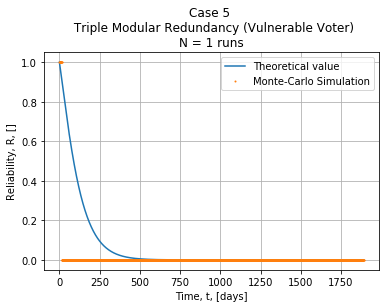

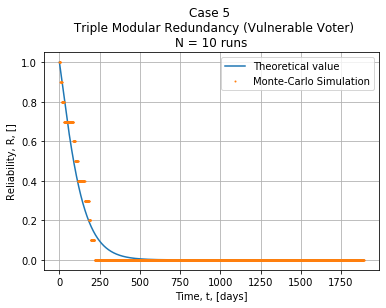

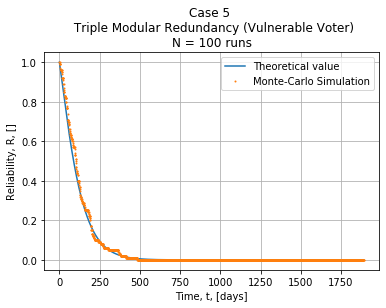

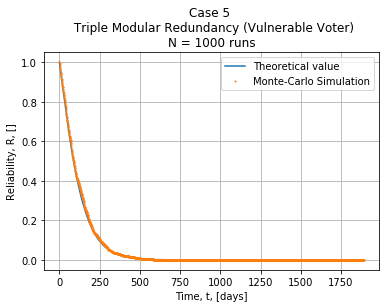

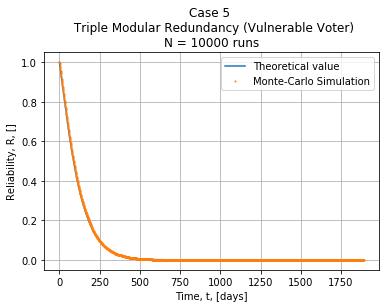

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from random_number_generators import linear_congruential_generator

# Reliability function definition
def system_reliability_function(time, mttf_mcu, mttf_voter):
    return np.exp(-time / mttf_voter)*(3*pow(np.exp(-time / mttf_mcu), 2) - 2*pow(np.exp(-time / mttf_mcu), 3))


# Component reliability
def component_reliability_function(time, mttf):
    return np.exp(-time / mttf)


def tmr(runs):
    random_numbers = linear_congruential_generator(0.389, runs+4)
    # Input data
    lambda_MCU = 3.17 * pow(10, -3)  # [per day, OMERE data]
    MTTF_MCU = 1 / lambda_MCU  # [days]

    lambda_voter = 6.02 * pow(10, -3)  # [per day, OMERE data]
    MTTF_voter = 1 / lambda_voter  # [days]

    # Define time domain

    t_start = 0
    t_end = 6 * MTTF_MCU
    t_step = 1
    time_domain = np.arange(t_start, t_end, t_step)

    # Calculate theoretical reliability at each time step
    theoretical_system_reliability = []
    theoretical_component_reliability = []
    theoretical_voter_reliability = []
    for i in range(0, np.size(time_domain)):
        theoretical_system_reliability.append(system_reliability_function(time_domain[i], MTTF_MCU, MTTF_voter))
        theoretical_component_reliability.append(component_reliability_function(time_domain[i], MTTF_MCU))
        theoretical_voter_reliability.append(component_reliability_function(time_domain[i], MTTF_voter))

    # Main Monte-Carlo Simulation
    failure_time_system = []
    working_systems = np.zeros(np.size(time_domain))
    for i in range(0, runs):
        random_value_first = random_numbers[i+1]
        random_value_second = random_numbers[i+2]
        random_value_third = random_numbers[i+3]
        random_value_voter = random_numbers[i+4]
        state_first_mcu = 1
        state_second_mcu = 1
        state_third_mcu = 1
        state_voter = 1
        for j in range(0, np.size(time_domain)):
            if theoretical_component_reliability[j] < random_value_first:
                state_first_mcu = 0
            if theoretical_component_reliability[j] < random_value_second:
                state_second_mcu = 0
            if theoretical_component_reliability[j] < random_value_third:
                state_third_mcu = 0
            if theoretical_voter_reliability[j] < random_value_voter:
                state_voter = 0
            total_state = state_first_mcu + state_second_mcu + state_third_mcu
            if total_state < 2 or state_voter == 0:
                failure_time_system.append(time_domain[j])
                break
            working_systems[j] += 1

    plt.figure()
    plt.plot(time_domain, theoretical_system_reliability, label="Theoretical value")
    plt.plot(time_domain, working_systems / runs, '.', markersize=2, label="Monte-Carlo Simulation")
    plt.xlabel("Time, t, [days]")
    plt.ylabel("Reliability, R, []")
    plt.title("Case 5 \n Triple Modular Redundancy (Vulnerable Voter)\nN = %d runs" % runs)
    plt.grid()
    plt.legend()
    plt.show()
    return time_domain, working_systems / runs

    
# Number of experiment runs
runs = [1, 10, 100, 1000, 10000]
for i in range(0, np.size(runs)):
    time_domain, result_case5 = tmr(runs[i])

## Compare all cases

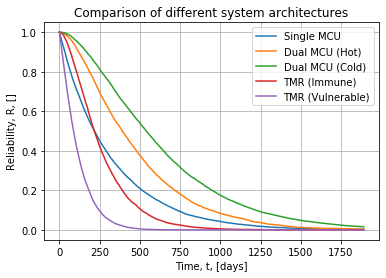

In [9]:
plt.figure()
plt.plot(time_domain, result_case1, label="Single MCU")
plt.plot(time_domain, result_case2, label="Dual MCU (Hot)")
plt.plot(time_domain, result_case3, label="Dual MCU (Cold)")
plt.plot(time_domain, result_case4, label="TMR (Immune)")
plt.plot(time_domain, result_case5, label="TMR (Vulnerable)")
plt.grid()
plt.title("Comparison of different system architectures")
plt.xlabel("Time, t, [days]")
plt.ylabel("Reliability, R, []")
plt.legend()
plt.show()

## TODO

1) Implement Time to Repair
   - Single Event Effects are not always destructive. For example, bit flips can be fixed with an automated restart or intervention from ground station meaning that two cases will be implemented:
     - Automatic restart (very short time to repair ~1-2 days)
     - Ground station intervention (time to repair equivalent to a few passes from the ground station ~5-6 days)
     - Decide which repair time to do using the random number generator
   - For this case, no analytical solutions for the reliability function can be provided. This means that the Monte Carlo simulation will be our only tool to investigate the reliability of the system.
2) Perform some statistical analysis (experimental time to failure, uptime etc.)
3) Investigate the gain by using more MCU's (redundant or modular) and provide 3D plots.